In [1]:
import ants
import numpy as np

In [2]:
fname1 = ants.get_ants_data('r16')
fname2 = ants.get_ants_data('r64')
print(fname1)
print(fname2)

/Users/mahdi/.antspy/r16slice.jpg
/Users/mahdi/.antspy/r64slice.jpg


In [3]:
img1 = ants.image_read(fname1)
img2 = ants.image_read(fname2)
print(img1)

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256)
	 Spacing    : (1.0, 1.0)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]



In [4]:
arr_4d = np.random.randn(70,70,70,10).astype('float32')
img_fmri = ants.from_numpy(arr_4d, has_components=True)
print(img_fmri)

# todo : tester aussi from_nibabel/ to_nibabel (-> .nii.gz)
#        nifti_to_ants

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 10
	 Dimensions : (70, 70, 70)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



dict_keys(['segmentation', 'probabilityimages'])


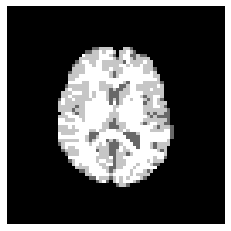

In [5]:
img = ants.image_read(ants.get_ants_data('r16'))
img = ants.resample_image(img, (64,64), 1, 0)
mask = ants.get_mask(img)
img_seg = ants.atropos(a=img, 
                       m='[0.2,1x1]', 
                       c='[2,0]', 
                       i='kmeans[3]', 
                       x=mask)
print(img_seg.keys())
ants.plot(img_seg['segmentation'])

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (64, 64)
	 Spacing    : (4.0476, 4.0476)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]



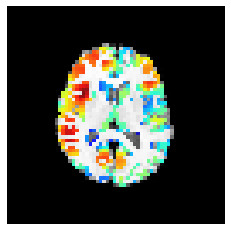

In [6]:
mg = ants.image_read( ants.get_ants_data('r16') ,2)
mask = ants.get_mask( img ).threshold_image( 1, 2 )
segs=ants.atropos( a = img, 
                   m = '[0.2,1x1]', 
                   c = '[2,0]',  
                   i = 'kmeans[3]', 
                   x = mask )
thickimg = ants.kelly_kapowski(s=segs['segmentation'], 
                               g=segs['probabilityimages'][1],
                               w=segs['probabilityimages'][2], 
                               its=45, 
                               r=0.5, 
                               m=1)
print(thickimg)
img.plot(overlay=thickimg, overlay_cmap='jet')

# Transform manually template 

In [74]:
import nrrd
import nibabel as nib
import numpy as np
import os
from pathlib import Path

template_file = '/Users/mahdi/stage-2022-mahdi/src/allen_template_25.nii.gz'
resolution = 25

# Load and manually transform the template
vol = nib.load(template_file).get_fdata()

vol_ras = np.moveaxis(vol, (0,1,2), (1,2,0))
vol_ras = np.flip(vol_ras, axis=2)
vol_ras = np.flip(vol_ras, axis=1)
template_ras_file = "/Users/mahdi/stage-2022-mahdi/src/allen_template_25_manualRAS.nii.gz"
affine = np.eye(4)
img_ras = nib.Nifti1Image(vol_ras, affine)
nib.save(img_ras, template_ras_file)

In [81]:
# load reference
avgt = nib.load('/Users/mahdi/stage-2022-mahdi/src/AVGT.nii.gz')
ref_vol = avgt.get_fdata()

# load moving
allen = nib.load('/Users/mahdi/stage-2022-mahdi/src/allen_template_25_manualRAS.nii.gz')
allen_vol = allen.get_fdata()


allen_vol = allen_vol.astype(float)
ref_vol = ref_vol.astype(float)

fixed = ants.from_numpy( ref_vol ).resample_image((164, 212, 158),1,0)
moving = ants.from_numpy( allen_vol ).resample_image((164, 212, 158),1,0)

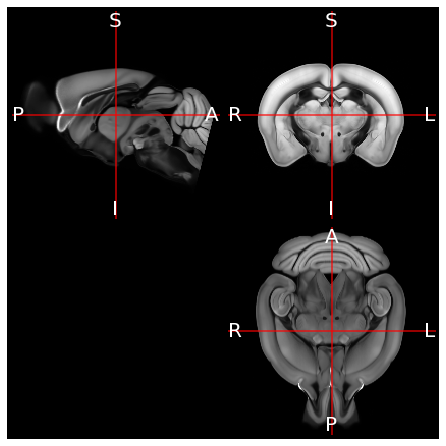

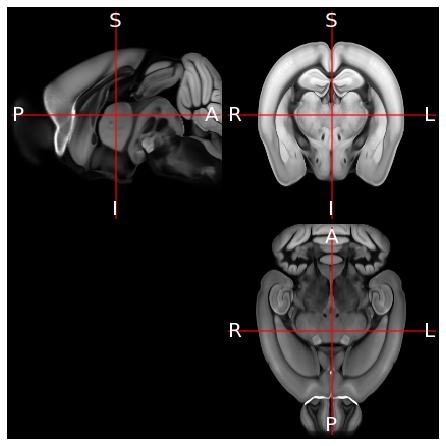

In [82]:
fixed.plot_ortho()
moving.plot_ortho()

In [83]:
mytx = ants.registration(fixed=fixed , moving=moving, type_of_transform='SyN' )

warped_moving = ants.apply_transforms(fixed=fixed, moving=moving, 
                                          transformlist=mytx['fwdtransforms'])

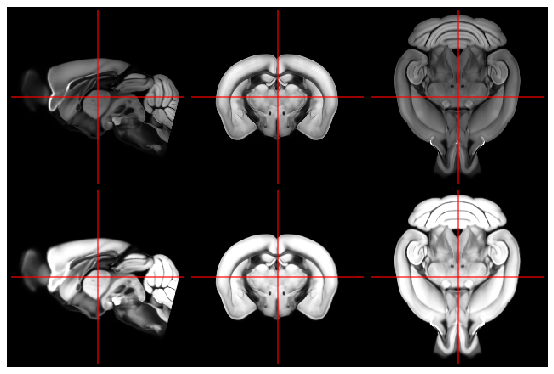

In [85]:
fixed.plot_ortho_double(warped_moving)


### essais nii nibabel ants

In [38]:
# todo : tester aussi from_nibabel/ to_nibabel (-> .nii.gz)
#        nifti_to_ants

import ants
import nrrd
import numpy as np

array, metadata = nrrd.read('/Users/mahdi/stage-2022-mahdi/src/average_template_25.nrrd')

img = ants.from_numpy(array) # convertir en float

orientation = ants.get_orientation(img)

print(orientation)

KeyError: 'uint16'